<a href="https://colab.research.google.com/github/buddeshya/stable_diffusion/blob/main/Homework_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new.

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

It is alright if you don't solve 100% of the tasks, the goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. Just click 'Connect' on the top right of the notebook. You can use any python libraries you want *unless* explicitly told to code your own algorithm. If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip.

**About the code**
* The provided code uses PyTorch. Refer to the tutorial [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) if you need to learn more about PyTorch.
* You can also ignore the code below and implement this task in a library of your choice such as TensorFlow, JAX or others.

# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

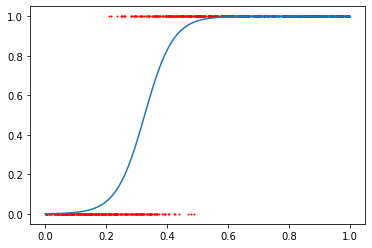

In the image above, the x and y axis correspond to the variables defined previously, with the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

In [ ]:
def logistic_regression(x, b1, b2):
  p_x = torch.sigmoid(torch.dot(x, torch.cat([b1, b2]))).squeeze()
  return p_x

def negative_log_likelihood(p_x, y):
  return -torch.mean(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x))


def update_parameters(x, y, p_x, b1, b2, learning_rate):

  # Calculate the gradient of the loss w.r.t. the weights
  loss = negative_log_likelihood(p_x, y)
  loss.backward()

  # Update the weights using SGD
  with torch.no_grad():
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad

  # Reset the gradients for the next iteration
  b1.grad.zero_()
  b2.grad.zero_()

In [ ]:
from tqdm import tqdm

input, label = generate_data()

# Make minibatches.
inputs = torch.split(input, 32)
labels = torch.split(label, 32)

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
learning_rate = 0.01


losses = []

for epoch in tqdm(range(1000)):
  for x, y in zip(inputs,labels):
    # Calculate p_x as per formula above

    p_x = torch.sigmoid(x*b2 + b1).squeeze()

    # # Update parameters using SGD
    update_parameters(x, y, p_x, b1, b2, learning_rate)

    # Print out the loss value (optional)
    loss_value = negative_log_likelihood(p_x, y).item()
    losses.append(loss_value)
  print(f'Epoch: {epoch+1} - Batch Loss: {loss_value:.4f}')

  2%|▏         | 18/1000 [00:00<00:11, 84.07it/s]

Epoch: 1 - Batch Loss: 0.6981
Epoch: 2 - Batch Loss: 0.7023
Epoch: 3 - Batch Loss: 0.7067
Epoch: 4 - Batch Loss: 0.7110
Epoch: 5 - Batch Loss: 0.7152
Epoch: 6 - Batch Loss: 0.7192
Epoch: 7 - Batch Loss: 0.7229
Epoch: 8 - Batch Loss: 0.7262
Epoch: 9 - Batch Loss: 0.7293
Epoch: 10 - Batch Loss: 0.7320
Epoch: 11 - Batch Loss: 0.7345
Epoch: 12 - Batch Loss: 0.7365
Epoch: 13 - Batch Loss: 0.7383
Epoch: 14 - Batch Loss: 0.7398
Epoch: 15 - Batch Loss: 0.7410
Epoch: 16 - Batch Loss: 0.7420
Epoch: 17 - Batch Loss: 0.7426
Epoch: 18 - Batch Loss: 0.7431


  3%|▎         | 27/1000 [00:00<00:12, 80.86it/s]

Epoch: 19 - Batch Loss: 0.7434
Epoch: 20 - Batch Loss: 0.7434
Epoch: 21 - Batch Loss: 0.7433
Epoch: 22 - Batch Loss: 0.7430
Epoch: 23 - Batch Loss: 0.7425
Epoch: 24 - Batch Loss: 0.7419
Epoch: 25 - Batch Loss: 0.7412
Epoch: 26 - Batch Loss: 0.7404
Epoch: 27 - Batch Loss: 0.7394
Epoch: 28 - Batch Loss: 0.7384
Epoch: 29 - Batch Loss: 0.7372
Epoch: 30 - Batch Loss: 0.7360
Epoch: 31 - Batch Loss: 0.7347
Epoch: 32 - Batch Loss: 0.7334
Epoch: 33 - Batch Loss: 0.7320
Epoch: 34 - Batch Loss: 0.7305


  4%|▍         | 45/1000 [00:00<00:11, 80.74it/s]

Epoch: 35 - Batch Loss: 0.7290
Epoch: 36 - Batch Loss: 0.7274
Epoch: 37 - Batch Loss: 0.7258
Epoch: 38 - Batch Loss: 0.7242
Epoch: 39 - Batch Loss: 0.7225
Epoch: 40 - Batch Loss: 0.7209
Epoch: 41 - Batch Loss: 0.7192
Epoch: 42 - Batch Loss: 0.7174
Epoch: 43 - Batch Loss: 0.7157
Epoch: 44 - Batch Loss: 0.7139
Epoch: 45 - Batch Loss: 0.7122
Epoch: 46 - Batch Loss: 0.7104
Epoch: 47 - Batch Loss: 0.7086
Epoch: 48 - Batch Loss: 0.7069
Epoch: 49 - Batch Loss: 0.7051
Epoch: 50 - Batch Loss: 0.7033
Epoch: 51 - Batch Loss: 0.7015
Epoch: 52 - Batch Loss: 0.6997


  6%|▋         | 63/1000 [00:00<00:11, 81.62it/s]

Epoch: 53 - Batch Loss: 0.6979
Epoch: 54 - Batch Loss: 0.6961
Epoch: 55 - Batch Loss: 0.6944
Epoch: 56 - Batch Loss: 0.6926
Epoch: 57 - Batch Loss: 0.6908
Epoch: 58 - Batch Loss: 0.6890
Epoch: 59 - Batch Loss: 0.6873
Epoch: 60 - Batch Loss: 0.6855
Epoch: 61 - Batch Loss: 0.6838
Epoch: 62 - Batch Loss: 0.6821
Epoch: 63 - Batch Loss: 0.6803
Epoch: 64 - Batch Loss: 0.6786
Epoch: 65 - Batch Loss: 0.6769
Epoch: 66 - Batch Loss: 0.6752
Epoch: 67 - Batch Loss: 0.6735
Epoch: 68 - Batch Loss: 0.6718
Epoch: 69 - Batch Loss: 0.6702


  8%|▊         | 81/1000 [00:00<00:11, 83.49it/s]

Epoch: 70 - Batch Loss: 0.6685
Epoch: 71 - Batch Loss: 0.6669
Epoch: 72 - Batch Loss: 0.6652
Epoch: 73 - Batch Loss: 0.6636
Epoch: 74 - Batch Loss: 0.6620
Epoch: 75 - Batch Loss: 0.6604
Epoch: 76 - Batch Loss: 0.6588
Epoch: 77 - Batch Loss: 0.6572
Epoch: 78 - Batch Loss: 0.6556
Epoch: 79 - Batch Loss: 0.6541
Epoch: 80 - Batch Loss: 0.6525
Epoch: 81 - Batch Loss: 0.6510
Epoch: 82 - Batch Loss: 0.6494
Epoch: 83 - Batch Loss: 0.6479
Epoch: 84 - Batch Loss: 0.6464
Epoch: 85 - Batch Loss: 0.6449
Epoch: 86 - Batch Loss: 0.6434
Epoch: 87 - Batch Loss: 0.6419


 10%|▉         | 99/1000 [00:01<00:10, 84.58it/s]

Epoch: 88 - Batch Loss: 0.6405
Epoch: 89 - Batch Loss: 0.6390
Epoch: 90 - Batch Loss: 0.6376
Epoch: 91 - Batch Loss: 0.6361
Epoch: 92 - Batch Loss: 0.6347
Epoch: 93 - Batch Loss: 0.6333
Epoch: 94 - Batch Loss: 0.6319
Epoch: 95 - Batch Loss: 0.6305
Epoch: 96 - Batch Loss: 0.6291
Epoch: 97 - Batch Loss: 0.6277
Epoch: 98 - Batch Loss: 0.6263
Epoch: 99 - Batch Loss: 0.6250
Epoch: 100 - Batch Loss: 0.6236
Epoch: 101 - Batch Loss: 0.6223
Epoch: 102 - Batch Loss: 0.6210
Epoch: 103 - Batch Loss: 0.6197
Epoch: 104 - Batch Loss: 0.6184
Epoch: 105 - Batch Loss: 0.6171


 12%|█▏        | 117/1000 [00:01<00:10, 83.33it/s]

Epoch: 106 - Batch Loss: 0.6158
Epoch: 107 - Batch Loss: 0.6145
Epoch: 108 - Batch Loss: 0.6132
Epoch: 109 - Batch Loss: 0.6120
Epoch: 110 - Batch Loss: 0.6107
Epoch: 111 - Batch Loss: 0.6095
Epoch: 112 - Batch Loss: 0.6082
Epoch: 113 - Batch Loss: 0.6070
Epoch: 114 - Batch Loss: 0.6058
Epoch: 115 - Batch Loss: 0.6046
Epoch: 116 - Batch Loss: 0.6034
Epoch: 117 - Batch Loss: 0.6022
Epoch: 118 - Batch Loss: 0.6010
Epoch: 119 - Batch Loss: 0.5998
Epoch: 120 - Batch Loss: 0.5987
Epoch: 121 - Batch Loss: 0.5975


 13%|█▎        | 134/1000 [00:01<00:10, 79.16it/s]

Epoch: 122 - Batch Loss: 0.5963
Epoch: 123 - Batch Loss: 0.5952
Epoch: 124 - Batch Loss: 0.5941
Epoch: 125 - Batch Loss: 0.5929
Epoch: 126 - Batch Loss: 0.5918
Epoch: 127 - Batch Loss: 0.5907
Epoch: 128 - Batch Loss: 0.5896
Epoch: 129 - Batch Loss: 0.5885
Epoch: 130 - Batch Loss: 0.5874
Epoch: 131 - Batch Loss: 0.5863
Epoch: 132 - Batch Loss: 0.5853
Epoch: 133 - Batch Loss: 0.5842
Epoch: 134 - Batch Loss: 0.5831
Epoch: 135 - Batch Loss: 0.5821
Epoch: 136 - Batch Loss: 0.5810
Epoch: 137 - Batch Loss: 0.5800
Epoch: 138 - Batch Loss: 0.5790


 15%|█▌        | 152/1000 [00:01<00:10, 81.36it/s]

Epoch: 139 - Batch Loss: 0.5779
Epoch: 140 - Batch Loss: 0.5769
Epoch: 141 - Batch Loss: 0.5759
Epoch: 142 - Batch Loss: 0.5749
Epoch: 143 - Batch Loss: 0.5739
Epoch: 144 - Batch Loss: 0.5729
Epoch: 145 - Batch Loss: 0.5719
Epoch: 146 - Batch Loss: 0.5710
Epoch: 147 - Batch Loss: 0.5700
Epoch: 148 - Batch Loss: 0.5690
Epoch: 149 - Batch Loss: 0.5681
Epoch: 150 - Batch Loss: 0.5671
Epoch: 151 - Batch Loss: 0.5662
Epoch: 152 - Batch Loss: 0.5652
Epoch: 153 - Batch Loss: 0.5643
Epoch: 154 - Batch Loss: 0.5634
Epoch: 155 - Batch Loss: 0.5624
Epoch: 156 - Batch Loss: 0.5615


 17%|█▋        | 170/1000 [00:02<00:10, 82.19it/s]

Epoch: 157 - Batch Loss: 0.5606
Epoch: 158 - Batch Loss: 0.5597
Epoch: 159 - Batch Loss: 0.5588
Epoch: 160 - Batch Loss: 0.5579
Epoch: 161 - Batch Loss: 0.5570
Epoch: 162 - Batch Loss: 0.5561
Epoch: 163 - Batch Loss: 0.5553
Epoch: 164 - Batch Loss: 0.5544
Epoch: 165 - Batch Loss: 0.5535
Epoch: 166 - Batch Loss: 0.5527
Epoch: 167 - Batch Loss: 0.5518
Epoch: 168 - Batch Loss: 0.5510
Epoch: 169 - Batch Loss: 0.5501
Epoch: 170 - Batch Loss: 0.5493
Epoch: 171 - Batch Loss: 0.5484
Epoch: 172 - Batch Loss: 0.5476
Epoch: 173 - Batch Loss: 0.5468


 19%|█▉        | 188/1000 [00:02<00:09, 83.19it/s]

Epoch: 174 - Batch Loss: 0.5460
Epoch: 175 - Batch Loss: 0.5452
Epoch: 176 - Batch Loss: 0.5444
Epoch: 177 - Batch Loss: 0.5436
Epoch: 178 - Batch Loss: 0.5428
Epoch: 179 - Batch Loss: 0.5420
Epoch: 180 - Batch Loss: 0.5412
Epoch: 181 - Batch Loss: 0.5404
Epoch: 182 - Batch Loss: 0.5396
Epoch: 183 - Batch Loss: 0.5388
Epoch: 184 - Batch Loss: 0.5381
Epoch: 185 - Batch Loss: 0.5373
Epoch: 186 - Batch Loss: 0.5365
Epoch: 187 - Batch Loss: 0.5358
Epoch: 188 - Batch Loss: 0.5350
Epoch: 189 - Batch Loss: 0.5343
Epoch: 190 - Batch Loss: 0.5335
Epoch: 191 - Batch Loss: 0.5328


 21%|██        | 206/1000 [00:02<00:09, 79.73it/s]

Epoch: 192 - Batch Loss: 0.5321
Epoch: 193 - Batch Loss: 0.5313
Epoch: 194 - Batch Loss: 0.5306
Epoch: 195 - Batch Loss: 0.5299
Epoch: 196 - Batch Loss: 0.5292
Epoch: 197 - Batch Loss: 0.5284
Epoch: 198 - Batch Loss: 0.5277
Epoch: 199 - Batch Loss: 0.5270
Epoch: 200 - Batch Loss: 0.5263
Epoch: 201 - Batch Loss: 0.5256
Epoch: 202 - Batch Loss: 0.5249
Epoch: 203 - Batch Loss: 0.5242
Epoch: 204 - Batch Loss: 0.5236
Epoch: 205 - Batch Loss: 0.5229
Epoch: 206 - Batch Loss: 0.5222
Epoch: 207 - Batch Loss: 0.5215


 22%|██▏       | 224/1000 [00:02<00:09, 82.17it/s]

Epoch: 208 - Batch Loss: 0.5209
Epoch: 209 - Batch Loss: 0.5202
Epoch: 210 - Batch Loss: 0.5195
Epoch: 211 - Batch Loss: 0.5189
Epoch: 212 - Batch Loss: 0.5182
Epoch: 213 - Batch Loss: 0.5176
Epoch: 214 - Batch Loss: 0.5169
Epoch: 215 - Batch Loss: 0.5163
Epoch: 216 - Batch Loss: 0.5156
Epoch: 217 - Batch Loss: 0.5150
Epoch: 218 - Batch Loss: 0.5143
Epoch: 219 - Batch Loss: 0.5137
Epoch: 220 - Batch Loss: 0.5131
Epoch: 221 - Batch Loss: 0.5125
Epoch: 222 - Batch Loss: 0.5118
Epoch: 223 - Batch Loss: 0.5112
Epoch: 224 - Batch Loss: 0.5106
Epoch: 225 - Batch Loss: 0.5100


 24%|██▍       | 242/1000 [00:02<00:09, 81.45it/s]

Epoch: 226 - Batch Loss: 0.5094
Epoch: 227 - Batch Loss: 0.5088
Epoch: 228 - Batch Loss: 0.5082
Epoch: 229 - Batch Loss: 0.5076
Epoch: 230 - Batch Loss: 0.5070
Epoch: 231 - Batch Loss: 0.5064
Epoch: 232 - Batch Loss: 0.5058
Epoch: 233 - Batch Loss: 0.5052
Epoch: 234 - Batch Loss: 0.5047
Epoch: 235 - Batch Loss: 0.5041
Epoch: 236 - Batch Loss: 0.5035
Epoch: 237 - Batch Loss: 0.5029
Epoch: 238 - Batch Loss: 0.5024
Epoch: 239 - Batch Loss: 0.5018
Epoch: 240 - Batch Loss: 0.5012
Epoch: 241 - Batch Loss: 0.5007
Epoch: 242 - Batch Loss: 0.5001


 25%|██▌       | 251/1000 [00:03<00:09, 80.86it/s]

Epoch: 243 - Batch Loss: 0.4996
Epoch: 244 - Batch Loss: 0.4990
Epoch: 245 - Batch Loss: 0.4985
Epoch: 246 - Batch Loss: 0.4979
Epoch: 247 - Batch Loss: 0.4974
Epoch: 248 - Batch Loss: 0.4968
Epoch: 249 - Batch Loss: 0.4963
Epoch: 250 - Batch Loss: 0.4957
Epoch: 251 - Batch Loss: 0.4952
Epoch: 252 - Batch Loss: 0.4947
Epoch: 253 - Batch Loss: 0.4942
Epoch: 254 - Batch Loss: 0.4936
Epoch: 255 - Batch Loss: 0.4931
Epoch: 256 - Batch Loss: 0.4926
Epoch: 257 - Batch Loss: 0.4921
Epoch: 258 - Batch Loss: 0.4916
Epoch: 259 - Batch Loss: 0.4910


 27%|██▋       | 269/1000 [00:03<00:08, 81.87it/s]

Epoch: 260 - Batch Loss: 0.4905
Epoch: 261 - Batch Loss: 0.4900
Epoch: 262 - Batch Loss: 0.4895
Epoch: 263 - Batch Loss: 0.4890
Epoch: 264 - Batch Loss: 0.4885
Epoch: 265 - Batch Loss: 0.4880
Epoch: 266 - Batch Loss: 0.4875
Epoch: 267 - Batch Loss: 0.4870
Epoch: 268 - Batch Loss: 0.4866
Epoch: 269 - Batch Loss: 0.4861
Epoch: 270 - Batch Loss: 0.4856
Epoch: 271 - Batch Loss: 0.4851
Epoch: 272 - Batch Loss: 0.4846
Epoch: 273 - Batch Loss: 0.4841
Epoch: 274 - Batch Loss: 0.4837
Epoch: 275 - Batch Loss: 0.4832
Epoch: 276 - Batch Loss: 0.4827


 29%|██▊       | 287/1000 [00:03<00:08, 79.98it/s]

Epoch: 277 - Batch Loss: 0.4823
Epoch: 278 - Batch Loss: 0.4818
Epoch: 279 - Batch Loss: 0.4813
Epoch: 280 - Batch Loss: 0.4809
Epoch: 281 - Batch Loss: 0.4804
Epoch: 282 - Batch Loss: 0.4799
Epoch: 283 - Batch Loss: 0.4795
Epoch: 284 - Batch Loss: 0.4790
Epoch: 285 - Batch Loss: 0.4786
Epoch: 286 - Batch Loss: 0.4781
Epoch: 287 - Batch Loss: 0.4777
Epoch: 288 - Batch Loss: 0.4772
Epoch: 289 - Batch Loss: 0.4768
Epoch: 290 - Batch Loss: 0.4764
Epoch: 291 - Batch Loss: 0.4759
Epoch: 292 - Batch Loss: 0.4755


 30%|███       | 305/1000 [00:03<00:08, 78.84it/s]

Epoch: 293 - Batch Loss: 0.4751
Epoch: 294 - Batch Loss: 0.4746
Epoch: 295 - Batch Loss: 0.4742
Epoch: 296 - Batch Loss: 0.4738
Epoch: 297 - Batch Loss: 0.4733
Epoch: 298 - Batch Loss: 0.4729
Epoch: 299 - Batch Loss: 0.4725
Epoch: 300 - Batch Loss: 0.4721
Epoch: 301 - Batch Loss: 0.4716
Epoch: 302 - Batch Loss: 0.4712
Epoch: 303 - Batch Loss: 0.4708
Epoch: 304 - Batch Loss: 0.4704
Epoch: 305 - Batch Loss: 0.4700
Epoch: 306 - Batch Loss: 0.4696
Epoch: 307 - Batch Loss: 0.4692
Epoch: 308 - Batch Loss: 0.4688


 32%|███▏      | 323/1000 [00:03<00:08, 82.45it/s]

Epoch: 309 - Batch Loss: 0.4684
Epoch: 310 - Batch Loss: 0.4680
Epoch: 311 - Batch Loss: 0.4676
Epoch: 312 - Batch Loss: 0.4672
Epoch: 313 - Batch Loss: 0.4668
Epoch: 314 - Batch Loss: 0.4664
Epoch: 315 - Batch Loss: 0.4660
Epoch: 316 - Batch Loss: 0.4656
Epoch: 317 - Batch Loss: 0.4652
Epoch: 318 - Batch Loss: 0.4648
Epoch: 319 - Batch Loss: 0.4644
Epoch: 320 - Batch Loss: 0.4640
Epoch: 321 - Batch Loss: 0.4637
Epoch: 322 - Batch Loss: 0.4633
Epoch: 323 - Batch Loss: 0.4629
Epoch: 324 - Batch Loss: 0.4625
Epoch: 325 - Batch Loss: 0.4621
Epoch: 326 - Batch Loss: 0.4618


 34%|███▍      | 341/1000 [00:04<00:08, 80.80it/s]

Epoch: 327 - Batch Loss: 0.4614
Epoch: 328 - Batch Loss: 0.4610
Epoch: 329 - Batch Loss: 0.4606
Epoch: 330 - Batch Loss: 0.4603
Epoch: 331 - Batch Loss: 0.4599
Epoch: 332 - Batch Loss: 0.4595
Epoch: 333 - Batch Loss: 0.4592
Epoch: 334 - Batch Loss: 0.4588
Epoch: 335 - Batch Loss: 0.4585
Epoch: 336 - Batch Loss: 0.4581
Epoch: 337 - Batch Loss: 0.4577
Epoch: 338 - Batch Loss: 0.4574
Epoch: 339 - Batch Loss: 0.4570
Epoch: 340 - Batch Loss: 0.4567
Epoch: 341 - Batch Loss: 0.4563
Epoch: 342 - Batch Loss: 0.4560
Epoch: 343 - Batch Loss: 0.4556


 36%|███▌      | 359/1000 [00:04<00:07, 83.06it/s]

Epoch: 344 - Batch Loss: 0.4553
Epoch: 345 - Batch Loss: 0.4549
Epoch: 346 - Batch Loss: 0.4546
Epoch: 347 - Batch Loss: 0.4542
Epoch: 348 - Batch Loss: 0.4539
Epoch: 349 - Batch Loss: 0.4536
Epoch: 350 - Batch Loss: 0.4532
Epoch: 351 - Batch Loss: 0.4529
Epoch: 352 - Batch Loss: 0.4526
Epoch: 353 - Batch Loss: 0.4522
Epoch: 354 - Batch Loss: 0.4519
Epoch: 355 - Batch Loss: 0.4516
Epoch: 356 - Batch Loss: 0.4512
Epoch: 357 - Batch Loss: 0.4509
Epoch: 358 - Batch Loss: 0.4506
Epoch: 359 - Batch Loss: 0.4502
Epoch: 360 - Batch Loss: 0.4499
Epoch: 361 - Batch Loss: 0.4496


 38%|███▊      | 377/1000 [00:04<00:07, 81.76it/s]

Epoch: 362 - Batch Loss: 0.4493
Epoch: 363 - Batch Loss: 0.4489
Epoch: 364 - Batch Loss: 0.4486
Epoch: 365 - Batch Loss: 0.4483
Epoch: 366 - Batch Loss: 0.4480
Epoch: 367 - Batch Loss: 0.4477
Epoch: 368 - Batch Loss: 0.4474
Epoch: 369 - Batch Loss: 0.4470
Epoch: 370 - Batch Loss: 0.4467
Epoch: 371 - Batch Loss: 0.4464
Epoch: 372 - Batch Loss: 0.4461
Epoch: 373 - Batch Loss: 0.4458
Epoch: 374 - Batch Loss: 0.4455
Epoch: 375 - Batch Loss: 0.4452
Epoch: 376 - Batch Loss: 0.4449
Epoch: 377 - Batch Loss: 0.4446
Epoch: 378 - Batch Loss: 0.4443


 40%|███▉      | 395/1000 [00:04<00:07, 83.53it/s]

Epoch: 379 - Batch Loss: 0.4440
Epoch: 380 - Batch Loss: 0.4437
Epoch: 381 - Batch Loss: 0.4434
Epoch: 382 - Batch Loss: 0.4431
Epoch: 383 - Batch Loss: 0.4428
Epoch: 384 - Batch Loss: 0.4425
Epoch: 385 - Batch Loss: 0.4422
Epoch: 386 - Batch Loss: 0.4419
Epoch: 387 - Batch Loss: 0.4416
Epoch: 388 - Batch Loss: 0.4413
Epoch: 389 - Batch Loss: 0.4410
Epoch: 390 - Batch Loss: 0.4407
Epoch: 391 - Batch Loss: 0.4404
Epoch: 392 - Batch Loss: 0.4402
Epoch: 393 - Batch Loss: 0.4399
Epoch: 394 - Batch Loss: 0.4396
Epoch: 395 - Batch Loss: 0.4393
Epoch: 396 - Batch Loss: 0.4390


 41%|████▏     | 413/1000 [00:05<00:07, 82.36it/s]

Epoch: 397 - Batch Loss: 0.4387
Epoch: 398 - Batch Loss: 0.4385
Epoch: 399 - Batch Loss: 0.4382
Epoch: 400 - Batch Loss: 0.4379
Epoch: 401 - Batch Loss: 0.4376
Epoch: 402 - Batch Loss: 0.4373
Epoch: 403 - Batch Loss: 0.4371
Epoch: 404 - Batch Loss: 0.4368
Epoch: 405 - Batch Loss: 0.4365
Epoch: 406 - Batch Loss: 0.4362
Epoch: 407 - Batch Loss: 0.4360
Epoch: 408 - Batch Loss: 0.4357
Epoch: 409 - Batch Loss: 0.4354
Epoch: 410 - Batch Loss: 0.4352
Epoch: 411 - Batch Loss: 0.4349
Epoch: 412 - Batch Loss: 0.4346
Epoch: 413 - Batch Loss: 0.4344


 43%|████▎     | 431/1000 [00:05<00:06, 83.77it/s]

Epoch: 414 - Batch Loss: 0.4341
Epoch: 415 - Batch Loss: 0.4338
Epoch: 416 - Batch Loss: 0.4336
Epoch: 417 - Batch Loss: 0.4333
Epoch: 418 - Batch Loss: 0.4331
Epoch: 419 - Batch Loss: 0.4328
Epoch: 420 - Batch Loss: 0.4325
Epoch: 421 - Batch Loss: 0.4323
Epoch: 422 - Batch Loss: 0.4320
Epoch: 423 - Batch Loss: 0.4318
Epoch: 424 - Batch Loss: 0.4315
Epoch: 425 - Batch Loss: 0.4313
Epoch: 426 - Batch Loss: 0.4310
Epoch: 427 - Batch Loss: 0.4308
Epoch: 428 - Batch Loss: 0.4305
Epoch: 429 - Batch Loss: 0.4303
Epoch: 430 - Batch Loss: 0.4300
Epoch: 431 - Batch Loss: 0.4298


 45%|████▍     | 449/1000 [00:05<00:06, 84.37it/s]

Epoch: 432 - Batch Loss: 0.4295
Epoch: 433 - Batch Loss: 0.4293
Epoch: 434 - Batch Loss: 0.4290
Epoch: 435 - Batch Loss: 0.4288
Epoch: 436 - Batch Loss: 0.4285
Epoch: 437 - Batch Loss: 0.4283
Epoch: 438 - Batch Loss: 0.4280
Epoch: 439 - Batch Loss: 0.4278
Epoch: 440 - Batch Loss: 0.4276
Epoch: 441 - Batch Loss: 0.4273
Epoch: 442 - Batch Loss: 0.4271
Epoch: 443 - Batch Loss: 0.4268
Epoch: 444 - Batch Loss: 0.4266
Epoch: 445 - Batch Loss: 0.4264
Epoch: 446 - Batch Loss: 0.4261
Epoch: 447 - Batch Loss: 0.4259
Epoch: 448 - Batch Loss: 0.4257
Epoch: 449 - Batch Loss: 0.4254


 46%|████▌     | 458/1000 [00:05<00:06, 80.70it/s]

Epoch: 450 - Batch Loss: 0.4252
Epoch: 451 - Batch Loss: 0.4250
Epoch: 452 - Batch Loss: 0.4247
Epoch: 453 - Batch Loss: 0.4245
Epoch: 454 - Batch Loss: 0.4243
Epoch: 455 - Batch Loss: 0.4240
Epoch: 456 - Batch Loss: 0.4238
Epoch: 457 - Batch Loss: 0.4236
Epoch: 458 - Batch Loss: 0.4234
Epoch: 459 - Batch Loss: 0.4231
Epoch: 460 - Batch Loss: 0.4229
Epoch: 461 - Batch Loss: 0.4227
Epoch: 462 - Batch Loss: 0.4225
Epoch: 463 - Batch Loss: 0.4222
Epoch: 464 - Batch Loss: 0.4220
Epoch: 465 - Batch Loss: 0.4218
Epoch: 466 - Batch Loss: 0.4216


 48%|████▊     | 476/1000 [00:05<00:06, 82.17it/s]

Epoch: 467 - Batch Loss: 0.4214
Epoch: 468 - Batch Loss: 0.4211
Epoch: 469 - Batch Loss: 0.4209
Epoch: 470 - Batch Loss: 0.4207
Epoch: 471 - Batch Loss: 0.4205
Epoch: 472 - Batch Loss: 0.4203
Epoch: 473 - Batch Loss: 0.4201
Epoch: 474 - Batch Loss: 0.4198
Epoch: 475 - Batch Loss: 0.4196
Epoch: 476 - Batch Loss: 0.4194
Epoch: 477 - Batch Loss: 0.4192
Epoch: 478 - Batch Loss: 0.4190
Epoch: 479 - Batch Loss: 0.4188
Epoch: 480 - Batch Loss: 0.4186
Epoch: 481 - Batch Loss: 0.4184
Epoch: 482 - Batch Loss: 0.4181
Epoch: 483 - Batch Loss: 0.4179


 49%|████▉     | 494/1000 [00:06<00:06, 83.59it/s]

Epoch: 484 - Batch Loss: 0.4177
Epoch: 485 - Batch Loss: 0.4175
Epoch: 486 - Batch Loss: 0.4173
Epoch: 487 - Batch Loss: 0.4171
Epoch: 488 - Batch Loss: 0.4169
Epoch: 489 - Batch Loss: 0.4167
Epoch: 490 - Batch Loss: 0.4165
Epoch: 491 - Batch Loss: 0.4163
Epoch: 492 - Batch Loss: 0.4161
Epoch: 493 - Batch Loss: 0.4159
Epoch: 494 - Batch Loss: 0.4157
Epoch: 495 - Batch Loss: 0.4155
Epoch: 496 - Batch Loss: 0.4153
Epoch: 497 - Batch Loss: 0.4151
Epoch: 498 - Batch Loss: 0.4149
Epoch: 499 - Batch Loss: 0.4147
Epoch: 500 - Batch Loss: 0.4145
Epoch: 501 - Batch Loss: 0.4143


 51%|█████     | 512/1000 [00:06<00:05, 83.41it/s]

Epoch: 502 - Batch Loss: 0.4141
Epoch: 503 - Batch Loss: 0.4139
Epoch: 504 - Batch Loss: 0.4137
Epoch: 505 - Batch Loss: 0.4135
Epoch: 506 - Batch Loss: 0.4133
Epoch: 507 - Batch Loss: 0.4131
Epoch: 508 - Batch Loss: 0.4129
Epoch: 509 - Batch Loss: 0.4127
Epoch: 510 - Batch Loss: 0.4126
Epoch: 511 - Batch Loss: 0.4124
Epoch: 512 - Batch Loss: 0.4122
Epoch: 513 - Batch Loss: 0.4120
Epoch: 514 - Batch Loss: 0.4118
Epoch: 515 - Batch Loss: 0.4116
Epoch: 516 - Batch Loss: 0.4114
Epoch: 517 - Batch Loss: 0.4112
Epoch: 518 - Batch Loss: 0.4110


 53%|█████▎    | 530/1000 [00:06<00:05, 84.55it/s]

Epoch: 519 - Batch Loss: 0.4109
Epoch: 520 - Batch Loss: 0.4107
Epoch: 521 - Batch Loss: 0.4105
Epoch: 522 - Batch Loss: 0.4103
Epoch: 523 - Batch Loss: 0.4101
Epoch: 524 - Batch Loss: 0.4099
Epoch: 525 - Batch Loss: 0.4098
Epoch: 526 - Batch Loss: 0.4096
Epoch: 527 - Batch Loss: 0.4094
Epoch: 528 - Batch Loss: 0.4092
Epoch: 529 - Batch Loss: 0.4090
Epoch: 530 - Batch Loss: 0.4089
Epoch: 531 - Batch Loss: 0.4087
Epoch: 532 - Batch Loss: 0.4085
Epoch: 533 - Batch Loss: 0.4083
Epoch: 534 - Batch Loss: 0.4081
Epoch: 535 - Batch Loss: 0.4080
Epoch: 536 - Batch Loss: 0.4078


 55%|█████▍    | 547/1000 [00:06<00:05, 76.92it/s]

Epoch: 537 - Batch Loss: 0.4076
Epoch: 538 - Batch Loss: 0.4074
Epoch: 539 - Batch Loss: 0.4073
Epoch: 540 - Batch Loss: 0.4071
Epoch: 541 - Batch Loss: 0.4069
Epoch: 542 - Batch Loss: 0.4067
Epoch: 543 - Batch Loss: 0.4066
Epoch: 544 - Batch Loss: 0.4064
Epoch: 545 - Batch Loss: 0.4062
Epoch: 546 - Batch Loss: 0.4061
Epoch: 547 - Batch Loss: 0.4059
Epoch: 548 - Batch Loss: 0.4057
Epoch: 549 - Batch Loss: 0.4055
Epoch: 550 - Batch Loss: 0.4054
Epoch: 551 - Batch Loss: 0.4052


 56%|█████▋    | 565/1000 [00:06<00:05, 81.32it/s]

Epoch: 552 - Batch Loss: 0.4050
Epoch: 553 - Batch Loss: 0.4049
Epoch: 554 - Batch Loss: 0.4047
Epoch: 555 - Batch Loss: 0.4045
Epoch: 556 - Batch Loss: 0.4044
Epoch: 557 - Batch Loss: 0.4042
Epoch: 558 - Batch Loss: 0.4040
Epoch: 559 - Batch Loss: 0.4039
Epoch: 560 - Batch Loss: 0.4037
Epoch: 561 - Batch Loss: 0.4035
Epoch: 562 - Batch Loss: 0.4034
Epoch: 563 - Batch Loss: 0.4032
Epoch: 564 - Batch Loss: 0.4031
Epoch: 565 - Batch Loss: 0.4029
Epoch: 566 - Batch Loss: 0.4027
Epoch: 567 - Batch Loss: 0.4026
Epoch: 568 - Batch Loss: 0.4024
Epoch: 569 - Batch Loss: 0.4023


 58%|█████▊    | 583/1000 [00:07<00:05, 82.79it/s]

Epoch: 570 - Batch Loss: 0.4021
Epoch: 571 - Batch Loss: 0.4019
Epoch: 572 - Batch Loss: 0.4018
Epoch: 573 - Batch Loss: 0.4016
Epoch: 574 - Batch Loss: 0.4015
Epoch: 575 - Batch Loss: 0.4013
Epoch: 576 - Batch Loss: 0.4011
Epoch: 577 - Batch Loss: 0.4010
Epoch: 578 - Batch Loss: 0.4008
Epoch: 579 - Batch Loss: 0.4007
Epoch: 580 - Batch Loss: 0.4005
Epoch: 581 - Batch Loss: 0.4004
Epoch: 582 - Batch Loss: 0.4002
Epoch: 583 - Batch Loss: 0.4001
Epoch: 584 - Batch Loss: 0.3999
Epoch: 585 - Batch Loss: 0.3997
Epoch: 586 - Batch Loss: 0.3996


 60%|██████    | 601/1000 [00:07<00:04, 82.65it/s]

Epoch: 587 - Batch Loss: 0.3994
Epoch: 588 - Batch Loss: 0.3993
Epoch: 589 - Batch Loss: 0.3991
Epoch: 590 - Batch Loss: 0.3990
Epoch: 591 - Batch Loss: 0.3988
Epoch: 592 - Batch Loss: 0.3987
Epoch: 593 - Batch Loss: 0.3985
Epoch: 594 - Batch Loss: 0.3984
Epoch: 595 - Batch Loss: 0.3982
Epoch: 596 - Batch Loss: 0.3981
Epoch: 597 - Batch Loss: 0.3979
Epoch: 598 - Batch Loss: 0.3978
Epoch: 599 - Batch Loss: 0.3977
Epoch: 600 - Batch Loss: 0.3975
Epoch: 601 - Batch Loss: 0.3974
Epoch: 602 - Batch Loss: 0.3972
Epoch: 603 - Batch Loss: 0.3971


 62%|██████▏   | 619/1000 [00:07<00:04, 83.59it/s]

Epoch: 604 - Batch Loss: 0.3969
Epoch: 605 - Batch Loss: 0.3968
Epoch: 606 - Batch Loss: 0.3966
Epoch: 607 - Batch Loss: 0.3965
Epoch: 608 - Batch Loss: 0.3963
Epoch: 609 - Batch Loss: 0.3962
Epoch: 610 - Batch Loss: 0.3961
Epoch: 611 - Batch Loss: 0.3959
Epoch: 612 - Batch Loss: 0.3958
Epoch: 613 - Batch Loss: 0.3956
Epoch: 614 - Batch Loss: 0.3955
Epoch: 615 - Batch Loss: 0.3954
Epoch: 616 - Batch Loss: 0.3952
Epoch: 617 - Batch Loss: 0.3951
Epoch: 618 - Batch Loss: 0.3949
Epoch: 619 - Batch Loss: 0.3948
Epoch: 620 - Batch Loss: 0.3947
Epoch: 621 - Batch Loss: 0.3945


 64%|██████▎   | 637/1000 [00:07<00:04, 78.19it/s]

Epoch: 622 - Batch Loss: 0.3944
Epoch: 623 - Batch Loss: 0.3942
Epoch: 624 - Batch Loss: 0.3941
Epoch: 625 - Batch Loss: 0.3940
Epoch: 626 - Batch Loss: 0.3938
Epoch: 627 - Batch Loss: 0.3937
Epoch: 628 - Batch Loss: 0.3936
Epoch: 629 - Batch Loss: 0.3934
Epoch: 630 - Batch Loss: 0.3933
Epoch: 631 - Batch Loss: 0.3931
Epoch: 632 - Batch Loss: 0.3930
Epoch: 633 - Batch Loss: 0.3929
Epoch: 634 - Batch Loss: 0.3927
Epoch: 635 - Batch Loss: 0.3926
Epoch: 636 - Batch Loss: 0.3925
Epoch: 637 - Batch Loss: 0.3923


 65%|██████▌   | 654/1000 [00:08<00:04, 78.48it/s]

Epoch: 638 - Batch Loss: 0.3922
Epoch: 639 - Batch Loss: 0.3921
Epoch: 640 - Batch Loss: 0.3919
Epoch: 641 - Batch Loss: 0.3918
Epoch: 642 - Batch Loss: 0.3917
Epoch: 643 - Batch Loss: 0.3916
Epoch: 644 - Batch Loss: 0.3914
Epoch: 645 - Batch Loss: 0.3913
Epoch: 646 - Batch Loss: 0.3912
Epoch: 647 - Batch Loss: 0.3910
Epoch: 648 - Batch Loss: 0.3909
Epoch: 649 - Batch Loss: 0.3908
Epoch: 650 - Batch Loss: 0.3907
Epoch: 651 - Batch Loss: 0.3905
Epoch: 652 - Batch Loss: 0.3904
Epoch: 653 - Batch Loss: 0.3903
Epoch: 654 - Batch Loss: 0.3901


 67%|██████▋   | 672/1000 [00:08<00:03, 82.64it/s]

Epoch: 655 - Batch Loss: 0.3900
Epoch: 656 - Batch Loss: 0.3899
Epoch: 657 - Batch Loss: 0.3898
Epoch: 658 - Batch Loss: 0.3896
Epoch: 659 - Batch Loss: 0.3895
Epoch: 660 - Batch Loss: 0.3894
Epoch: 661 - Batch Loss: 0.3893
Epoch: 662 - Batch Loss: 0.3891
Epoch: 663 - Batch Loss: 0.3890
Epoch: 664 - Batch Loss: 0.3889
Epoch: 665 - Batch Loss: 0.3888
Epoch: 666 - Batch Loss: 0.3886
Epoch: 667 - Batch Loss: 0.3885
Epoch: 668 - Batch Loss: 0.3884
Epoch: 669 - Batch Loss: 0.3883
Epoch: 670 - Batch Loss: 0.3882
Epoch: 671 - Batch Loss: 0.3880
Epoch: 672 - Batch Loss: 0.3879


 68%|██████▊   | 681/1000 [00:08<00:03, 82.88it/s]

Epoch: 673 - Batch Loss: 0.3878
Epoch: 674 - Batch Loss: 0.3877
Epoch: 675 - Batch Loss: 0.3875
Epoch: 676 - Batch Loss: 0.3874
Epoch: 677 - Batch Loss: 0.3873
Epoch: 678 - Batch Loss: 0.3872
Epoch: 679 - Batch Loss: 0.3871
Epoch: 680 - Batch Loss: 0.3869
Epoch: 681 - Batch Loss: 0.3868
Epoch: 682 - Batch Loss: 0.3867
Epoch: 683 - Batch Loss: 0.3866
Epoch: 684 - Batch Loss: 0.3865
Epoch: 685 - Batch Loss: 0.3864
Epoch: 686 - Batch Loss: 0.3862
Epoch: 687 - Batch Loss: 0.3861
Epoch: 688 - Batch Loss: 0.3860


 70%|██████▉   | 698/1000 [00:08<00:04, 67.92it/s]

Epoch: 689 - Batch Loss: 0.3859
Epoch: 690 - Batch Loss: 0.3858
Epoch: 691 - Batch Loss: 0.3857
Epoch: 692 - Batch Loss: 0.3855
Epoch: 693 - Batch Loss: 0.3854
Epoch: 694 - Batch Loss: 0.3853
Epoch: 695 - Batch Loss: 0.3852
Epoch: 696 - Batch Loss: 0.3851
Epoch: 697 - Batch Loss: 0.3850
Epoch: 698 - Batch Loss: 0.3849
Epoch: 699 - Batch Loss: 0.3847


 71%|███████   | 706/1000 [00:08<00:04, 64.12it/s]

Epoch: 700 - Batch Loss: 0.3846
Epoch: 701 - Batch Loss: 0.3845
Epoch: 702 - Batch Loss: 0.3844
Epoch: 703 - Batch Loss: 0.3843
Epoch: 704 - Batch Loss: 0.3842
Epoch: 705 - Batch Loss: 0.3841
Epoch: 706 - Batch Loss: 0.3840
Epoch: 707 - Batch Loss: 0.3838
Epoch: 708 - Batch Loss: 0.3837
Epoch: 709 - Batch Loss: 0.3836
Epoch: 710 - Batch Loss: 0.3835
Epoch: 711 - Batch Loss: 0.3834
Epoch: 712 - Batch Loss: 0.3833


 72%|███████▏  | 720/1000 [00:09<00:04, 62.72it/s]

Epoch: 713 - Batch Loss: 0.3832
Epoch: 714 - Batch Loss: 0.3831
Epoch: 715 - Batch Loss: 0.3830
Epoch: 716 - Batch Loss: 0.3829
Epoch: 717 - Batch Loss: 0.3827
Epoch: 718 - Batch Loss: 0.3826
Epoch: 719 - Batch Loss: 0.3825
Epoch: 720 - Batch Loss: 0.3824
Epoch: 721 - Batch Loss: 0.3823
Epoch: 722 - Batch Loss: 0.3822
Epoch: 723 - Batch Loss: 0.3821
Epoch: 724 - Batch Loss: 0.3820
Epoch: 725 - Batch Loss: 0.3819


 73%|███████▎  | 734/1000 [00:09<00:04, 62.57it/s]

Epoch: 726 - Batch Loss: 0.3818
Epoch: 727 - Batch Loss: 0.3817
Epoch: 728 - Batch Loss: 0.3816
Epoch: 729 - Batch Loss: 0.3815
Epoch: 730 - Batch Loss: 0.3814
Epoch: 731 - Batch Loss: 0.3813
Epoch: 732 - Batch Loss: 0.3811
Epoch: 733 - Batch Loss: 0.3810
Epoch: 734 - Batch Loss: 0.3809
Epoch: 735 - Batch Loss: 0.3808
Epoch: 736 - Batch Loss: 0.3807
Epoch: 737 - Batch Loss: 0.3806
Epoch: 738 - Batch Loss: 0.3805


 75%|███████▍  | 748/1000 [00:09<00:04, 62.16it/s]

Epoch: 739 - Batch Loss: 0.3804
Epoch: 740 - Batch Loss: 0.3803
Epoch: 741 - Batch Loss: 0.3802
Epoch: 742 - Batch Loss: 0.3801
Epoch: 743 - Batch Loss: 0.3800
Epoch: 744 - Batch Loss: 0.3799
Epoch: 745 - Batch Loss: 0.3798
Epoch: 746 - Batch Loss: 0.3797
Epoch: 747 - Batch Loss: 0.3796
Epoch: 748 - Batch Loss: 0.3795
Epoch: 749 - Batch Loss: 0.3794
Epoch: 750 - Batch Loss: 0.3793


 76%|███████▌  | 761/1000 [00:09<00:04, 56.68it/s]

Epoch: 751 - Batch Loss: 0.3792
Epoch: 752 - Batch Loss: 0.3791
Epoch: 753 - Batch Loss: 0.3790
Epoch: 754 - Batch Loss: 0.3789
Epoch: 755 - Batch Loss: 0.3788
Epoch: 756 - Batch Loss: 0.3787
Epoch: 757 - Batch Loss: 0.3786
Epoch: 758 - Batch Loss: 0.3785
Epoch: 759 - Batch Loss: 0.3784
Epoch: 760 - Batch Loss: 0.3783
Epoch: 761 - Batch Loss: 0.3782


 77%|███████▋  | 773/1000 [00:09<00:04, 55.87it/s]

Epoch: 762 - Batch Loss: 0.3781
Epoch: 763 - Batch Loss: 0.3780
Epoch: 764 - Batch Loss: 0.3779
Epoch: 765 - Batch Loss: 0.3778
Epoch: 766 - Batch Loss: 0.3777
Epoch: 767 - Batch Loss: 0.3776
Epoch: 768 - Batch Loss: 0.3775
Epoch: 769 - Batch Loss: 0.3774
Epoch: 770 - Batch Loss: 0.3773
Epoch: 771 - Batch Loss: 0.3772
Epoch: 772 - Batch Loss: 0.3771
Epoch: 773 - Batch Loss: 0.3771


 78%|███████▊  | 785/1000 [00:10<00:03, 56.67it/s]

Epoch: 774 - Batch Loss: 0.3770
Epoch: 775 - Batch Loss: 0.3769
Epoch: 776 - Batch Loss: 0.3768
Epoch: 777 - Batch Loss: 0.3767
Epoch: 778 - Batch Loss: 0.3766
Epoch: 779 - Batch Loss: 0.3765
Epoch: 780 - Batch Loss: 0.3764
Epoch: 781 - Batch Loss: 0.3763
Epoch: 782 - Batch Loss: 0.3762
Epoch: 783 - Batch Loss: 0.3761
Epoch: 784 - Batch Loss: 0.3760
Epoch: 785 - Batch Loss: 0.3759


 79%|███████▉  | 791/1000 [00:10<00:03, 54.24it/s]

Epoch: 786 - Batch Loss: 0.3758
Epoch: 787 - Batch Loss: 0.3757
Epoch: 788 - Batch Loss: 0.3756
Epoch: 789 - Batch Loss: 0.3756
Epoch: 790 - Batch Loss: 0.3755
Epoch: 791 - Batch Loss: 0.3754
Epoch: 792 - Batch Loss: 0.3753
Epoch: 793 - Batch Loss: 0.3752
Epoch: 794 - Batch Loss: 0.3751
Epoch: 795 - Batch Loss: 0.3750


 80%|████████  | 803/1000 [00:10<00:03, 50.56it/s]

Epoch: 796 - Batch Loss: 0.3749
Epoch: 797 - Batch Loss: 0.3748
Epoch: 798 - Batch Loss: 0.3747
Epoch: 799 - Batch Loss: 0.3746
Epoch: 800 - Batch Loss: 0.3746
Epoch: 801 - Batch Loss: 0.3745
Epoch: 802 - Batch Loss: 0.3744
Epoch: 803 - Batch Loss: 0.3743
Epoch: 804 - Batch Loss: 0.3742
Epoch: 805 - Batch Loss: 0.3741


 82%|████████▏ | 818/1000 [00:10<00:03, 57.44it/s]

Epoch: 806 - Batch Loss: 0.3740
Epoch: 807 - Batch Loss: 0.3739
Epoch: 808 - Batch Loss: 0.3738
Epoch: 809 - Batch Loss: 0.3738
Epoch: 810 - Batch Loss: 0.3737
Epoch: 811 - Batch Loss: 0.3736
Epoch: 812 - Batch Loss: 0.3735
Epoch: 813 - Batch Loss: 0.3734
Epoch: 814 - Batch Loss: 0.3733
Epoch: 815 - Batch Loss: 0.3732
Epoch: 816 - Batch Loss: 0.3731
Epoch: 817 - Batch Loss: 0.3731
Epoch: 818 - Batch Loss: 0.3730
Epoch: 819 - Batch Loss: 0.3729


 84%|████████▎ | 836/1000 [00:10<00:02, 69.08it/s]

Epoch: 820 - Batch Loss: 0.3728
Epoch: 821 - Batch Loss: 0.3727
Epoch: 822 - Batch Loss: 0.3726
Epoch: 823 - Batch Loss: 0.3725
Epoch: 824 - Batch Loss: 0.3725
Epoch: 825 - Batch Loss: 0.3724
Epoch: 826 - Batch Loss: 0.3723
Epoch: 827 - Batch Loss: 0.3722
Epoch: 828 - Batch Loss: 0.3721
Epoch: 829 - Batch Loss: 0.3720
Epoch: 830 - Batch Loss: 0.3720
Epoch: 831 - Batch Loss: 0.3719
Epoch: 832 - Batch Loss: 0.3718
Epoch: 833 - Batch Loss: 0.3717
Epoch: 834 - Batch Loss: 0.3716
Epoch: 835 - Batch Loss: 0.3715
Epoch: 836 - Batch Loss: 0.3715


 85%|████████▌ | 854/1000 [00:11<00:01, 76.85it/s]

Epoch: 837 - Batch Loss: 0.3714
Epoch: 838 - Batch Loss: 0.3713
Epoch: 839 - Batch Loss: 0.3712
Epoch: 840 - Batch Loss: 0.3711
Epoch: 841 - Batch Loss: 0.3710
Epoch: 842 - Batch Loss: 0.3710
Epoch: 843 - Batch Loss: 0.3709
Epoch: 844 - Batch Loss: 0.3708
Epoch: 845 - Batch Loss: 0.3707
Epoch: 846 - Batch Loss: 0.3706
Epoch: 847 - Batch Loss: 0.3705
Epoch: 848 - Batch Loss: 0.3705
Epoch: 849 - Batch Loss: 0.3704
Epoch: 850 - Batch Loss: 0.3703
Epoch: 851 - Batch Loss: 0.3702
Epoch: 852 - Batch Loss: 0.3701
Epoch: 853 - Batch Loss: 0.3701
Epoch: 854 - Batch Loss: 0.3700


 87%|████████▋ | 871/1000 [00:11<00:01, 80.02it/s]

Epoch: 855 - Batch Loss: 0.3699
Epoch: 856 - Batch Loss: 0.3698
Epoch: 857 - Batch Loss: 0.3697
Epoch: 858 - Batch Loss: 0.3697
Epoch: 859 - Batch Loss: 0.3696
Epoch: 860 - Batch Loss: 0.3695
Epoch: 861 - Batch Loss: 0.3694
Epoch: 862 - Batch Loss: 0.3694
Epoch: 863 - Batch Loss: 0.3693
Epoch: 864 - Batch Loss: 0.3692
Epoch: 865 - Batch Loss: 0.3691
Epoch: 866 - Batch Loss: 0.3690
Epoch: 867 - Batch Loss: 0.3690
Epoch: 868 - Batch Loss: 0.3689
Epoch: 869 - Batch Loss: 0.3688
Epoch: 870 - Batch Loss: 0.3687
Epoch: 871 - Batch Loss: 0.3686


 88%|████████▊ | 880/1000 [00:11<00:01, 80.48it/s]

Epoch: 872 - Batch Loss: 0.3686
Epoch: 873 - Batch Loss: 0.3685
Epoch: 874 - Batch Loss: 0.3684
Epoch: 875 - Batch Loss: 0.3683
Epoch: 876 - Batch Loss: 0.3683
Epoch: 877 - Batch Loss: 0.3682
Epoch: 878 - Batch Loss: 0.3681
Epoch: 879 - Batch Loss: 0.3680
Epoch: 880 - Batch Loss: 0.3680
Epoch: 881 - Batch Loss: 0.3679
Epoch: 882 - Batch Loss: 0.3678
Epoch: 883 - Batch Loss: 0.3677
Epoch: 884 - Batch Loss: 0.3677
Epoch: 885 - Batch Loss: 0.3676
Epoch: 886 - Batch Loss: 0.3675
Epoch: 887 - Batch Loss: 0.3674
Epoch: 888 - Batch Loss: 0.3674


 90%|████████▉ | 898/1000 [00:11<00:01, 82.50it/s]

Epoch: 889 - Batch Loss: 0.3673
Epoch: 890 - Batch Loss: 0.3672
Epoch: 891 - Batch Loss: 0.3671
Epoch: 892 - Batch Loss: 0.3671
Epoch: 893 - Batch Loss: 0.3670
Epoch: 894 - Batch Loss: 0.3669
Epoch: 895 - Batch Loss: 0.3668
Epoch: 896 - Batch Loss: 0.3668
Epoch: 897 - Batch Loss: 0.3667
Epoch: 898 - Batch Loss: 0.3666
Epoch: 899 - Batch Loss: 0.3666
Epoch: 900 - Batch Loss: 0.3665
Epoch: 901 - Batch Loss: 0.3664
Epoch: 902 - Batch Loss: 0.3663
Epoch: 903 - Batch Loss: 0.3663
Epoch: 904 - Batch Loss: 0.3662
Epoch: 905 - Batch Loss: 0.3661


 92%|█████████▏| 916/1000 [00:11<00:01, 81.61it/s]

Epoch: 906 - Batch Loss: 0.3660
Epoch: 907 - Batch Loss: 0.3660
Epoch: 908 - Batch Loss: 0.3659
Epoch: 909 - Batch Loss: 0.3658
Epoch: 910 - Batch Loss: 0.3658
Epoch: 911 - Batch Loss: 0.3657
Epoch: 912 - Batch Loss: 0.3656
Epoch: 913 - Batch Loss: 0.3655
Epoch: 914 - Batch Loss: 0.3655
Epoch: 915 - Batch Loss: 0.3654
Epoch: 916 - Batch Loss: 0.3653
Epoch: 917 - Batch Loss: 0.3653
Epoch: 918 - Batch Loss: 0.3652
Epoch: 919 - Batch Loss: 0.3651
Epoch: 920 - Batch Loss: 0.3651
Epoch: 921 - Batch Loss: 0.3650
Epoch: 922 - Batch Loss: 0.3649


 93%|█████████▎| 934/1000 [00:12<00:00, 82.05it/s]

Epoch: 923 - Batch Loss: 0.3648
Epoch: 924 - Batch Loss: 0.3648
Epoch: 925 - Batch Loss: 0.3647
Epoch: 926 - Batch Loss: 0.3646
Epoch: 927 - Batch Loss: 0.3646
Epoch: 928 - Batch Loss: 0.3645
Epoch: 929 - Batch Loss: 0.3644
Epoch: 930 - Batch Loss: 0.3644
Epoch: 931 - Batch Loss: 0.3643
Epoch: 932 - Batch Loss: 0.3642
Epoch: 933 - Batch Loss: 0.3642
Epoch: 934 - Batch Loss: 0.3641
Epoch: 935 - Batch Loss: 0.3640
Epoch: 936 - Batch Loss: 0.3640
Epoch: 937 - Batch Loss: 0.3639
Epoch: 938 - Batch Loss: 0.3638
Epoch: 939 - Batch Loss: 0.3637


 95%|█████████▌| 952/1000 [00:12<00:00, 81.04it/s]

Epoch: 940 - Batch Loss: 0.3637
Epoch: 941 - Batch Loss: 0.3636
Epoch: 942 - Batch Loss: 0.3635
Epoch: 943 - Batch Loss: 0.3635
Epoch: 944 - Batch Loss: 0.3634
Epoch: 945 - Batch Loss: 0.3633
Epoch: 946 - Batch Loss: 0.3633
Epoch: 947 - Batch Loss: 0.3632
Epoch: 948 - Batch Loss: 0.3631
Epoch: 949 - Batch Loss: 0.3631
Epoch: 950 - Batch Loss: 0.3630
Epoch: 951 - Batch Loss: 0.3629
Epoch: 952 - Batch Loss: 0.3629
Epoch: 953 - Batch Loss: 0.3628
Epoch: 954 - Batch Loss: 0.3628


 96%|█████████▌| 961/1000 [00:12<00:00, 67.17it/s]

Epoch: 955 - Batch Loss: 0.3627
Epoch: 956 - Batch Loss: 0.3626
Epoch: 957 - Batch Loss: 0.3626
Epoch: 958 - Batch Loss: 0.3625
Epoch: 959 - Batch Loss: 0.3624
Epoch: 960 - Batch Loss: 0.3624
Epoch: 961 - Batch Loss: 0.3623
Epoch: 962 - Batch Loss: 0.3622
Epoch: 963 - Batch Loss: 0.3622
Epoch: 964 - Batch Loss: 0.3621


 97%|█████████▋| 969/1000 [00:12<00:00, 59.41it/s]

Epoch: 965 - Batch Loss: 0.3620
Epoch: 966 - Batch Loss: 0.3620
Epoch: 967 - Batch Loss: 0.3619
Epoch: 968 - Batch Loss: 0.3618
Epoch: 969 - Batch Loss: 0.3618
Epoch: 970 - Batch Loss: 0.3617
Epoch: 971 - Batch Loss: 0.3617
Epoch: 972 - Batch Loss: 0.3616
Epoch: 973 - Batch Loss: 0.3615


 98%|█████████▊| 982/1000 [00:13<00:00, 51.89it/s]

Epoch: 974 - Batch Loss: 0.3615
Epoch: 975 - Batch Loss: 0.3614
Epoch: 976 - Batch Loss: 0.3613
Epoch: 977 - Batch Loss: 0.3613
Epoch: 978 - Batch Loss: 0.3612
Epoch: 979 - Batch Loss: 0.3612
Epoch: 980 - Batch Loss: 0.3611
Epoch: 981 - Batch Loss: 0.3610
Epoch: 982 - Batch Loss: 0.3610
Epoch: 983 - Batch Loss: 0.3609


 99%|█████████▉| 988/1000 [00:13<00:00, 50.41it/s]

Epoch: 984 - Batch Loss: 0.3608
Epoch: 985 - Batch Loss: 0.3608
Epoch: 986 - Batch Loss: 0.3607
Epoch: 987 - Batch Loss: 0.3607
Epoch: 988 - Batch Loss: 0.3606
Epoch: 989 - Batch Loss: 0.3605
Epoch: 990 - Batch Loss: 0.3605
Epoch: 991 - Batch Loss: 0.3604
Epoch: 992 - Batch Loss: 0.3604
Epoch: 993 - Batch Loss: 0.3603


100%|██████████| 1000/1000 [00:13<00:00, 74.41it/s]

Epoch: 994 - Batch Loss: 0.3602
Epoch: 995 - Batch Loss: 0.3602
Epoch: 996 - Batch Loss: 0.3601
Epoch: 997 - Batch Loss: 0.3600
Epoch: 998 - Batch Loss: 0.3600
Epoch: 999 - Batch Loss: 0.3599
Epoch: 1000 - Batch Loss: 0.3599


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y_hat = torch.sigmoid(input*b2 + b1).detach().numpy()

plt.figure(figsize=(10,6))
plt.scatter(input, y_hat)
plt.scatter(input, label.detach().numpy(), color="red")
plt.title('Logistic Activation Function')
plt.show()

# Part 2

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. For this problem you will need to use a regression loss, not a classification loss.

Successful training should result in a data interpolation similar to the below:
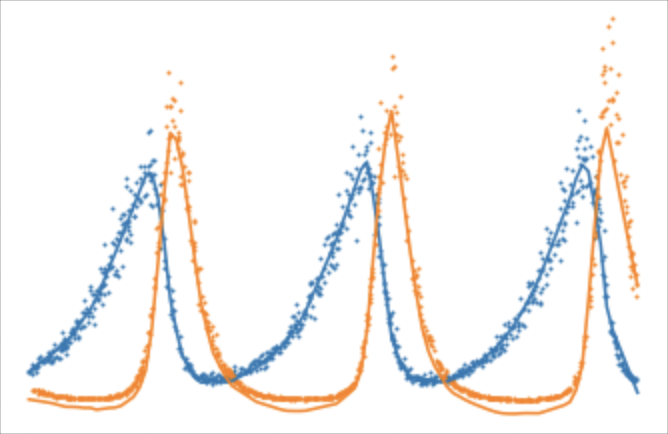

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")
df['y'] = df['y'].replace('-', np.nan)
df['y'] = df['y'].astype(float)
df['y'].fillna(df['y'].mode()[0], inplace=True)
df['y'] = df['y'].astype(float)
df['x'] = df['x'].replace('-', np.nan)
df['x'] = df['x'].astype(float)
df['x'].fillna(df['y'].mode()[0], inplace=True)
df['x'] = df['x'].astype(float)

In [ ]:
df.to_csv("data1.csv")

In [ ]:
#Experimentation

# import pandas as pd
# from scipy.interpolate import interp1d  # for interpolation

# def preprocess_timeseries( gap_fill_method="interpolate", noise_reduction="none"):

#   df = pd.read_csv("data1.csv")

#   if gap_fill_method == "interpolate":
#     for col in ["x", "y"]:
#       f = interp1d(df["t"], df[col], kind="linear")
#       df[col] = f(df["t"])
#   elif gap_fill_method == "delete":
#     df.dropna(subset=["x", "y"], inplace=True)
#   else:
#     raise ValueError("Invalid gap_fill_method")

#   if noise_reduction == "filter":
#     # Apply a moving average filter to reduce high-frequency noise (example)
#     window_size = 5  # Experiment with different window sizes
#     df["x_filtered"] = df["x"].rolling(window=window_size).mean()
#     df["y_filtered"] = df["y"].rolling(window=window_size).mean()
#   elif noise_reduction == "smooth":
#     from scipy.signal import savgol_filter
#     window_length = 51
#     poly_order = 3
#     df["x_smoothed"] = savgol_filter(df["x"], window_length, poly_order)
#     df["y_smoothed"] = savgol_filter(df["y"], window_length, poly_order)
#   else:
#     pass

#   return df

# preprocessed_data = preprocess_timeseries( gap_fill_method="interpolate", noise_reduction="filter")
# print(preprocessed_data)

      Unnamed: 0      t         x         y  x_filtered  y_filtered
0              0   0.00  0.000000  0.575905         NaN         NaN
1              1   0.01  0.000000  0.000000         NaN         NaN
2              2   0.02  1.115912  0.000000         NaN         NaN
3              3   0.03  0.000000  0.000000         NaN         NaN
4              4   0.04  1.005483  0.477527    0.424279    0.210686
...          ...    ...       ...       ...         ...         ...
1995        1995  19.95  0.000000  0.000000    0.257550    0.837272
1996        1996  19.96  0.000000  0.000000    0.257550    0.000000
1997        1997  19.97  0.000000  0.000000    0.257550    0.000000
1998        1998  19.98  0.622993  0.000000    0.246187    0.000000
1999        1999  19.99  0.622504  0.000000    0.249099    0.000000

[2000 rows x 6 columns]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

BATCH_SIZE = 32

class Net(nn.Module):
    '''Model to regress 2d time series values given scalar input.'''
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 2)

        print("Layer 1 (fc1) size:", self.fc1.weight.size())
        print("Layer 2 (fc2) size:", self.fc2.weight.size())
        print("Layer 3 (fc3) size:", self.fc3.weight.size())

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.time = self.data['t']
        self.x = self.data['x']
        self.y = self.data['y']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        time = torch.tensor(self.time[idx], dtype=torch.float32)
        values = torch.tensor([self.x[idx], self.y[idx]], dtype = torch.float32)

        sample = {'time': time, 'values': values}

        return sample

dataset = TimeSeriesDataset('data1.csv')
trainloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

def loss_fn(outputs, labels):
    loss = nn.MSELoss()
    return loss(outputs, labels)


net = Net()

optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(300):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data['time'].unsqueeze(1), data['values']

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

Layer 1 (fc1) size: torch.Size([64, 1])
Layer 2 (fc2) size: torch.Size([64, 64])
Layer 3 (fc3) size: torch.Size([2, 64])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,    20] loss: 4.938
[1,    40] loss: 4.364
[1,    60] loss: 4.594
[2,    20] loss: 3.988
[2,    40] loss: 4.203
[2,    60] loss: 4.900
[3,    20] loss: 4.545
[3,    40] loss: 4.037
[3,    60] loss: 4.683
[4,    20] loss: 4.566
[4,    40] loss: 4.432
[4,    60] loss: 4.129
[5,    20] loss: 4.374
[5,    40] loss: 4.322
[5,    60] loss: 4.293
[6,    20] loss: 4.304
[6,    40] loss: 4.019
[6,    60] loss: 4.526
[7,    20] loss: 4.005
[7,    40] loss: 3.930
[7,    60] loss: 4.795
[8,    20] loss: 4.656
[8,    40] loss: 4.128
[8,    60] loss: 3.824
[9,    20] loss: 4.349
[9,    40] loss: 3.914
[9,    60] loss: 4.349
[10,    20] loss: 4.219
[10,    40] loss: 4.416
[10,    60] loss: 4.070
[11,    20] loss: 3.971
[11,    40] loss: 4.343
[11,    60] loss: 4.333
[12,    20] loss: 4.209
[12,    40] loss: 4.431
[12,    60] loss: 3.811
[13,    20] loss: 4.513
[13,    40] loss: 4.101
[13,    60] loss: 3.935
[14,    20] loss: 4.218
[14,    40] loss: 4.205
[14,    60] loss: 4.138
[15,    20] loss: 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from CSV file into a pandas dataframe
data = pd.read_csv('data1.csv')

# Convert the dataframe into a tensor
tensor_data = torch.tensor(data.values.astype('float64'), dtype=torch.float32)

# Pass the tensor data to the PyTorch eval model
model = Net()
model.eval()
outputs = model(tensor_data[:, 0].unsqueeze(1))

# Collect all the output in Numpy
numpy_outputs = outputs.detach().numpy()

Layer 1 (fc1) size: torch.Size([64, 1])
Layer 2 (fc2) size: torch.Size([64, 64])
Layer 3 (fc3) size: torch.Size([2, 64])


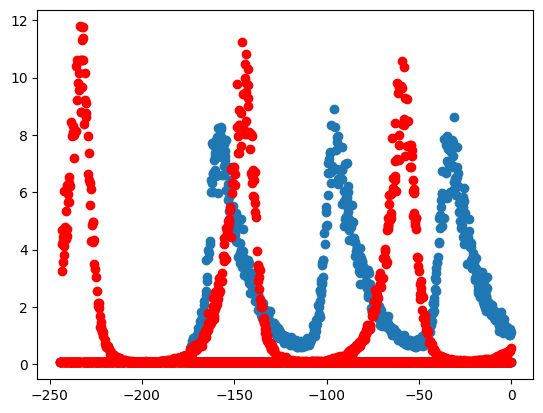

In [ ]:
plt.scatter(numpy_outputs[:, 0], data['x'])
plt.scatter(numpy_outputs[:, 1], data['y'], color = "red")
plt.show()

### Time-series extension [optional]

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


# Part 3

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

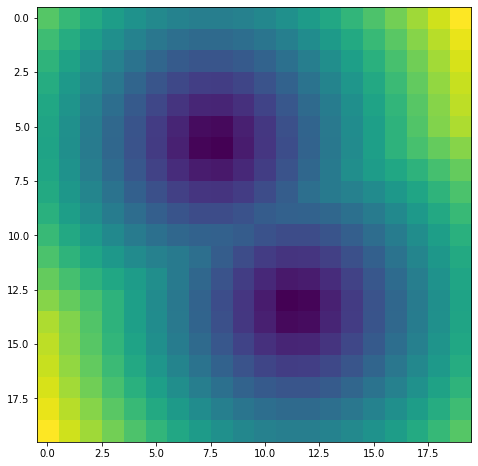


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

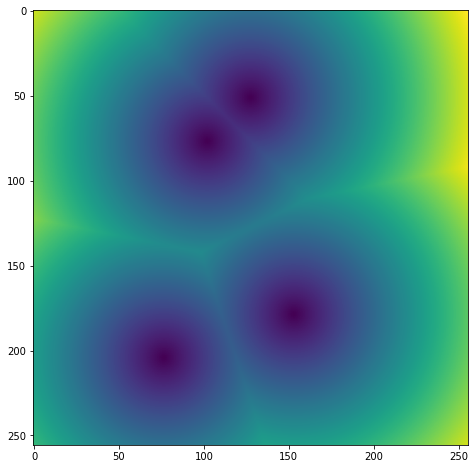


In [ ]:
def min_dist(coordinates, resolution):
    coordinates = torch.tensor(coordinates)

    # Create grid of pixel coordinates
    x = torch.linspace(0, 1, resolution)
    y = torch.linspace(0, 1, resolution)
    grid_x, grid_y = torch.meshgrid(x, y)
    grid = torch.stack((grid_x, grid_y), dim=-1)

    # Expand dimensions for broadcasting
    grid = grid.unsqueeze(0)
    coordinates = coordinates.unsqueeze(1).unsqueeze(1)

    # Compute distance between each grid point and data point
    distances = torch.sqrt(torch.sum((grid - coordinates) ** 2, dim=-1))

    # Take minimum distance along data point dimension
    min_distances, _ = torch.min(distances, dim=0)

    return min_distances.T

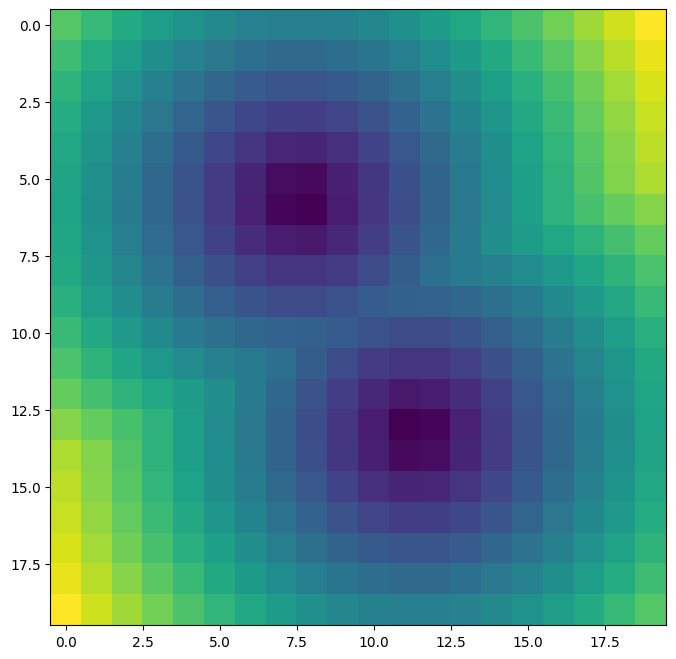

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

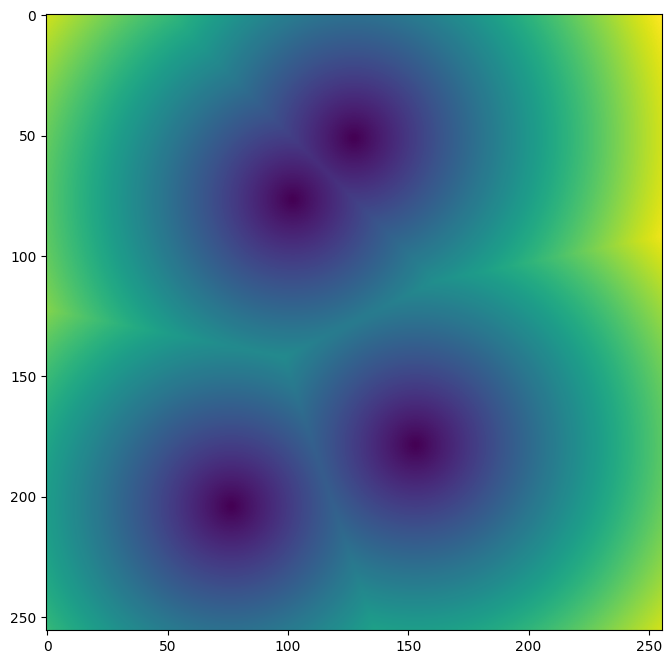

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

### Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  values = np.random.randint(0, 10, batch_size*num_points).reshape(batch_size, num_points)
  values = np.expand_dims(values, 2)
  points = np.concatenate((coords, values), axis=2)
  return points

In [ ]:
def min_dist(points, res):
  """Calculates a 3D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a numpy array of 2D coordinates and point values, normalized to
              be in the range [0,1]. The expected shape is [B, P, 3].
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points. The return tensor
    shape is [B, res, res].
  """
  points = torch.tensor(points)

  # Extract coordinates and values
  coords = points[..., :2]
  values = points[..., 2:]

  # Create grid of pixel coordinates
  x = torch.linspace(0, 1, res)
  y = torch.linspace(0, 1, res)
  grid_x, grid_y = torch.meshgrid(x, y)
  grid = torch.stack((grid_x, grid_y), dim=-1)

  # Expand dimensions for broadcasting
  grid = grid.unsqueeze(0)
  coords = coords.unsqueeze(2).unsqueeze(2)

  # Compute distance between each grid point and data point
  distances = torch.sqrt(torch.sum((grid - coords) ** 2, dim=-1))

  # Take minimum distance along data point dimension
  min_distances, _ = torch.min(distances, dim=0)

  return min_distances.T

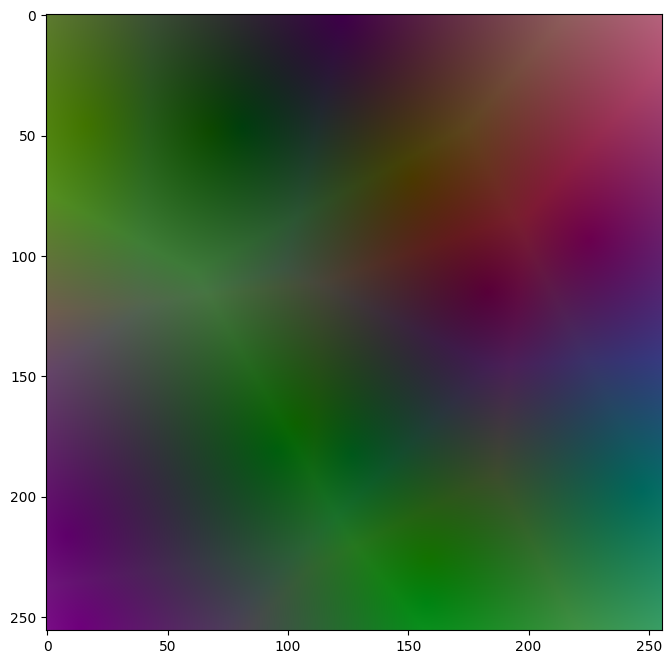

In [ ]:

batch_size = 5
num_points = 3
res = 256

points = create_points(batch_size, num_points)
distance_to_data = min_dist(points, res)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

### Scalable version [optional]

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.